In [19]:
#Analysewerkzeuge
#Projekt Daniel Braunstein Mat.Nr.: 52000347
#Analyse der Lebenskosten im Bezug auf das Einkommen von 2000 - 2023

In [20]:
#Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from docutils.nodes import label
from networkx.algorithms.bipartite.basic import color

In [21]:
#File importieren.
df = pd.read_csv('Cost_of_Living_and_Income_Extended.csv')

#Unique der Länder Werte bestimmen
Länder = df['Country'].unique()
Länder

#Überprüfen ob 0 oder NaN Werte vorkommen
df_Fehler = df.isnull().values.any() or (df==0).values.any()

#Beurteilen der Werte
df_Fehler = df[(df==0).any(axis=1) | df.isna().any(axis=1)]
df_Fehler
### Es handelt sich lediglich um 0.0 und kein NaN, die Daten sind sauber und die Analyse kann fortgesetzt werden

,Country,Year,Average_Monthly_Income,Cost_of_Living,Housing_Cost_Percentage,Tax_Rate,Savings_Percentage,Healthcare_Cost_Percentage,Education_Cost_Percentage,Transportation_Cost_Percentage,Region
225,Canada,2011,1860.77,642.03,42.83,19.34,0.0,19.98,13.9,8.69,North America


In [22]:
#Testcode
#Gruppieren auf die Länder und Berechnen der Durchschnittswerte der Spalten
#Erstellen neuens Dataframe
df_Australia_Test = df[df['Country'] == 'Australia']
df_Australia_Test = df_Australia_Test[['Country', 'Year', 'Average_Monthly_Income', 'Cost_of_Living']]

#Gruppieren der Jahre
df_Australia_Test = df_Australia_Test.groupby('Year')[['Average_Monthly_Income', 'Cost_of_Living']].mean().reset_index()
df_Australia_Test

,Year,Average_Monthly_Income,Cost_of_Living
0,2000,4027.592500,3768.815000
1,2001,7480.845000,5887.030000
2,2002,1120.990000,2999.510000
3,2003,4675.720000,6585.710000
4,2004,3591.493333,4607.230000
5,2005,6984.050000,3331.815000
6,2006,4156.886667,5185.130000
7,2008,1107.850000,4788.420000
8,2009,6040.865000,6388.135000
9,2010,7093.390000,3678.660000


In [23]:
#Testcode
df_Russia_Test = df[df['Country'] == 'Russia']
df_Russia_Test = df_Russia_Test[['Country', 'Year', 'Average_Monthly_Income', 'Cost_of_Living']]

#Gruppieren der Jahre
df_Russia_Test = df_Russia_Test.groupby('Year')[['Average_Monthly_Income', 'Cost_of_Living']].mean().reset_index()
df_Russia_Test

,Year,Average_Monthly_Income,Cost_of_Living
0,2000,2712.515000,3686.195000
1,2003,4565.055000,3296.820000
2,2004,4795.570000,2410.040000
3,2006,598.210000,2100.710000
4,2007,4530.470000,6840.710000
5,2008,5186.576667,3841.330000
6,2009,6834.120000,2428.110000
7,2011,6712.115000,2627.155000
8,2012,3598.726667,2863.660000
9,2014,6422.643333,5152.766667


In [24]:
#Funktion Erstellen um alle 
def Länderdaten(df, country):
    
    df_country = df[df['Country'] == country]
    
    #Auswahl der Spalten welche ich mitgeben möchte
    df_country = df_country[['Country','Year','Average_Monthly_Income', 'Cost_of_Living', 'Housing_Cost_Percentage', 'Tax_Rate', 'Savings_Percentage', 'Healthcare_Cost_Percentage', 'Education_Cost_Percentage', 'Transportation_Cost_Percentage']]
    
    #Gruppieren auf Jahre
    df_country = df_country.groupby('Year')[['Average_Monthly_Income', 'Cost_of_Living', 'Housing_Cost_Percentage', 'Tax_Rate', 'Savings_Percentage', 'Healthcare_Cost_Percentage', 'Education_Cost_Percentage', 'Transportation_Cost_Percentage']].mean().reset_index()
    return df_country

    

In [25]:
#Berechnen der Länderdaten
#Auf eine Schleife durch die oben erstellte Liste "Länder" wird bewusst verzichtet, 
#da im Anschluss einzlen Spalten zur Analyse seperat angesprochen werden

#Australien
df_australia = Länderdaten(df, 'Australia')
#Indien
df_india = Länderdaten(df, 'India')
#Russia
df_russia = Länderdaten(df, 'Russia')
#South Africa
df_south_africa = Länderdaten(df, 'South Africa')
#Brazil
df_brazil = Länderdaten(df, 'Brazil')
#China
df_china = Länderdaten(df, 'China')
#Japan
df_japan = Länderdaten(df, 'Japan')
#Canda
df_canada = Länderdaten(df, 'Canada')
#Germany
df_germany = Länderdaten(df, 'Germany')
#Mexico
df_mexico = Länderdaten(df, 'Mexico')
#United States
df_united_states = Länderdaten(df, 'United States')
#France
df_france = Länderdaten(df, 'France')



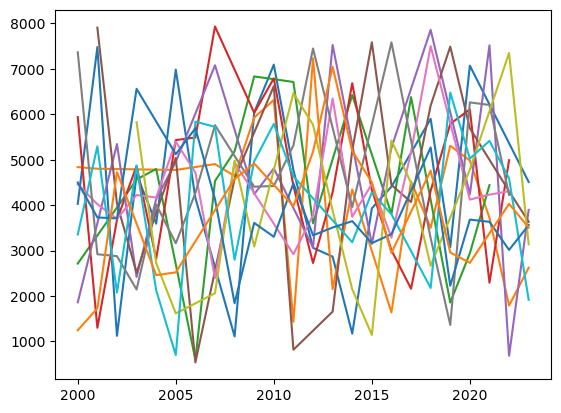

In [26]:
#Analyse der Average Monthly Income
#Vollständiger Plot
plot_AMI_Australia = plt.plot(df_australia['Year'], df_australia['Average_Monthly_Income'], label = 'Australia')
plot_AMI_India = plt.plot(df_india['Year'], df_india['Average_Monthly_Income'], label = 'India')
plot_AMI_Russia = plt.plot(df_russia['Year'], df_russia['Average_Monthly_Income'], label = 'Russia')
plot_AMI_South_Africa = plt.plot(df_south_africa['Year'], df_south_africa['Average_Monthly_Income'], label = 'South Africa')
plot_AMI_Brazil = plt.plot(df_brazil['Year'], df_brazil['Average_Monthly_Income'], label = 'Brazil')
plot_AMI_China = plt.plot(df_china['Year'], df_china['Average_Monthly_Income'], label = 'China')
plot_AMI_Japan = plt.plot(df_japan['Year'], df_japan['Average_Monthly_Income'], label = 'Japan')
plot_AMI_Canada = plt.plot(df_canada['Year'], df_canada['Average_Monthly_Income'], label = 'Canada')
plot_AMI_Germany = plt.plot(df_germany['Year'], df_germany['Average_Monthly_Income'], label = 'Germany')
plot_AMI_Mexico = plt.plot(df_mexico['Year'], df_mexico['Average_Monthly_Income'], label = 'Mexico')
plot_AMI_United_States = plt.plot(df_united_states['Year'], df_united_states['Average_Monthly_Income'], label = 'United States')
plot_AMI_France = plt.plot(df_france['Year'], df_france['Average_Monthly_Income'], label = 'France')



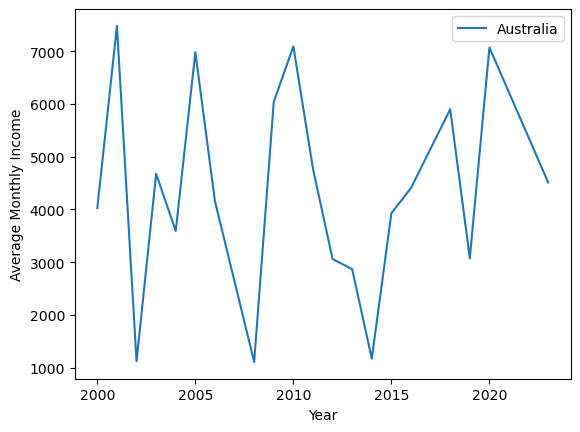

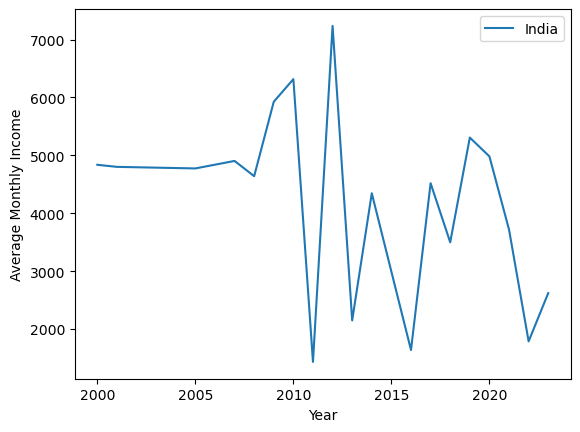

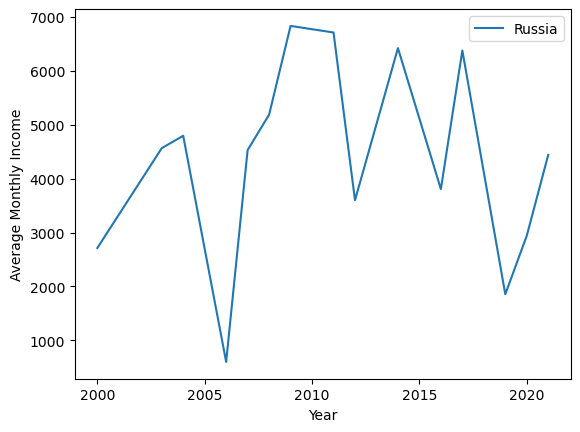

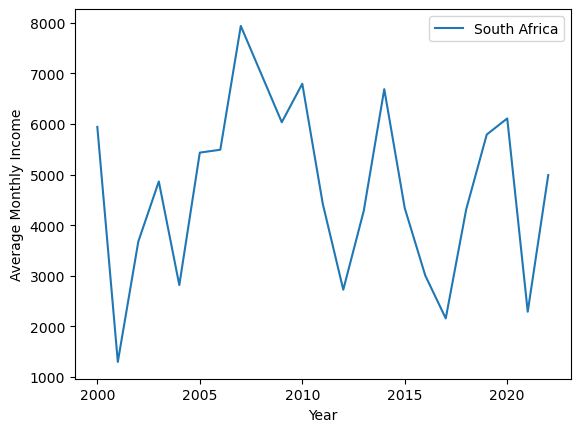

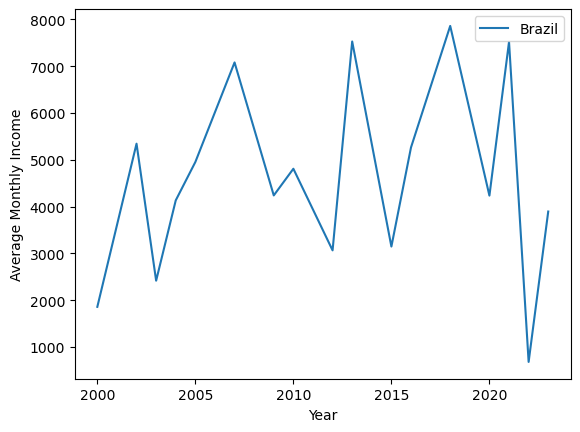

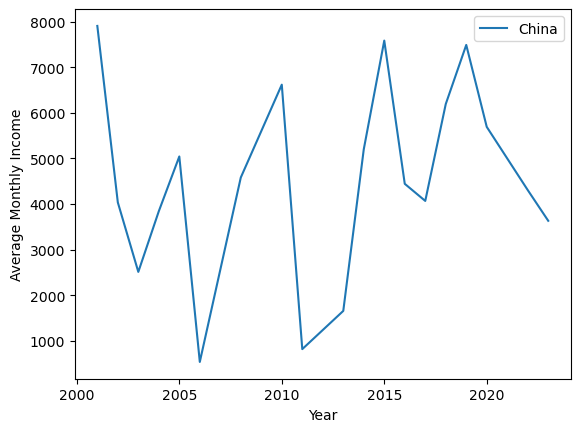

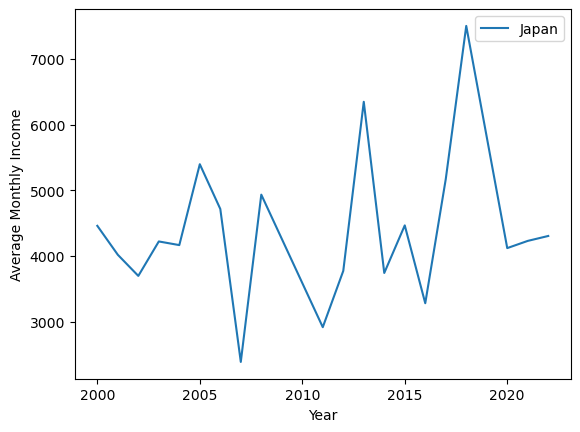

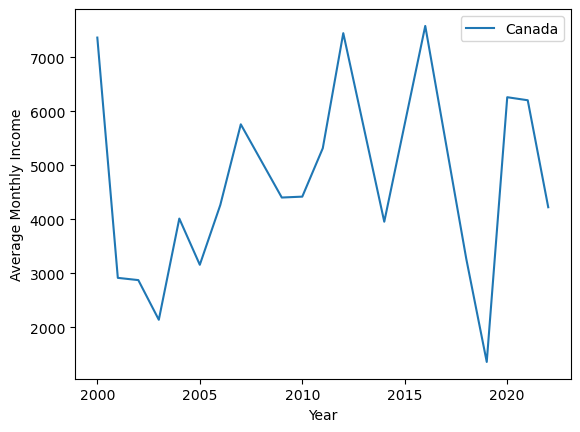

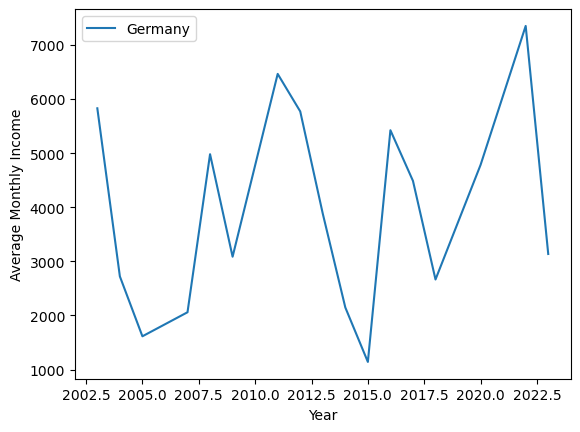

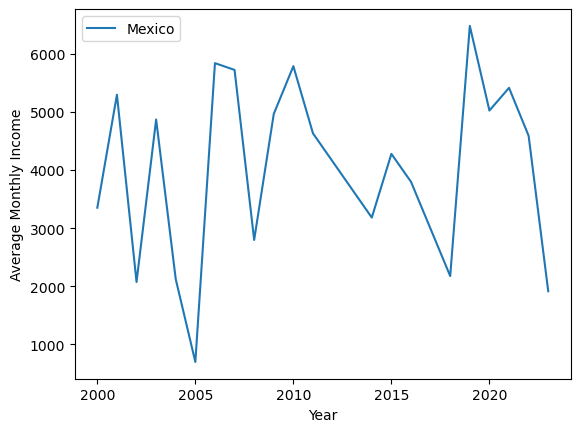

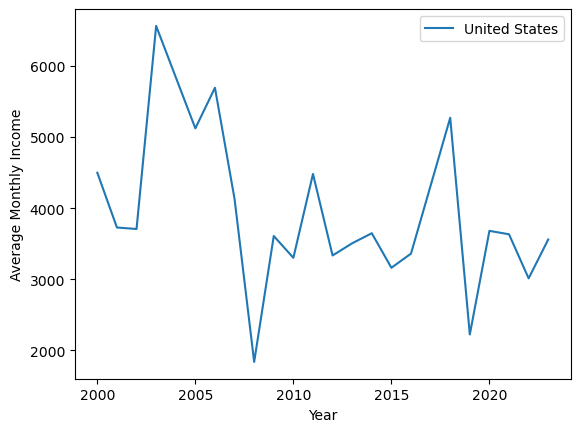

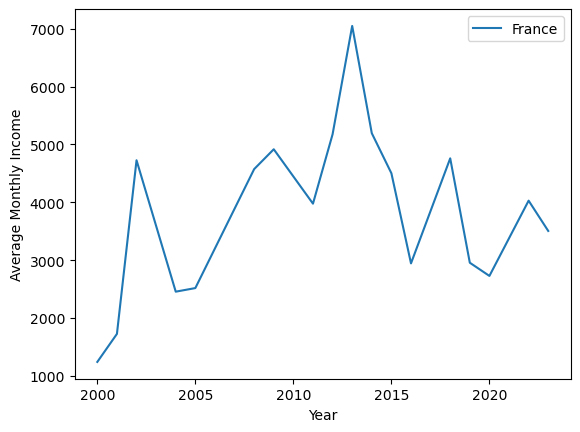

In [27]:
#Generieren AMI Plots für jedes Land

#Definieren der Länderdaten
Länderdaten_AMI = [
    {'Länderdaten': df_australia, 'label': 'Australia'},
    {'Länderdaten': df_india, 'label': 'India'},
    {'Länderdaten': df_russia, 'label': 'Russia'},
    {'Länderdaten': df_south_africa, 'label': 'South Africa'},
    {'Länderdaten': df_brazil, 'label': 'Brazil'},
    {'Länderdaten': df_china, 'label': 'China'},
    {'Länderdaten': df_japan, 'label': 'Japan'},
    {'Länderdaten': df_canada, 'label': 'Canada'},
    {'Länderdaten': df_germany, 'label': 'Germany'},
    {'Länderdaten': df_mexico, 'label': 'Mexico'},
    {'Länderdaten': df_united_states, 'label': 'United States'},
    {'Länderdaten': df_france, 'label': 'France'},
]

#Schleifer für die Länderdaten
for länder in Länderdaten_AMI:
    df = länder['Länderdaten']
    label = länder['label']

#Gestalten des Plots
    plt.figure()
    plt.plot(df["Year"], df["Average_Monthly_Income"], label=label)
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Average Monthly Income')
    plt.show()



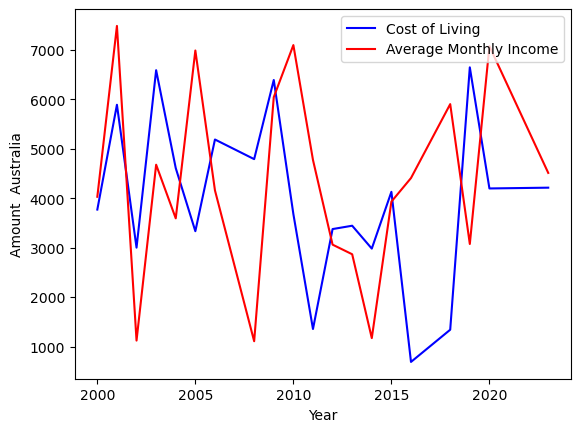

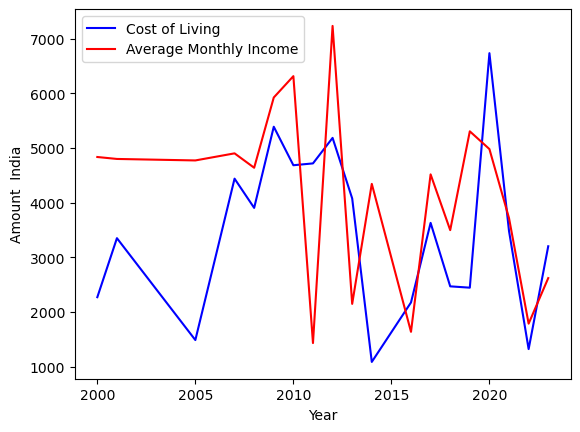

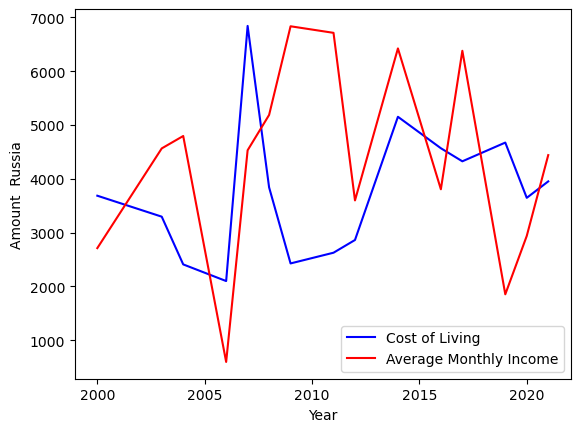

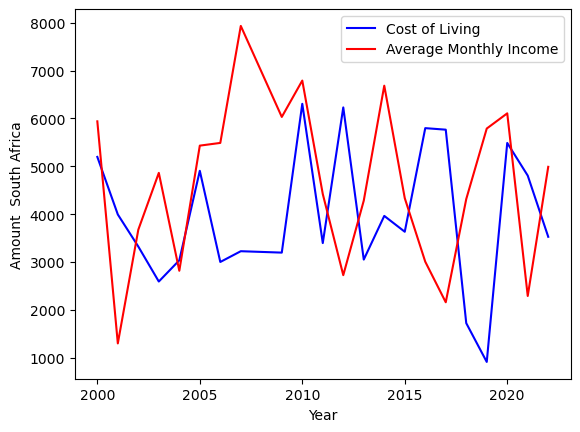

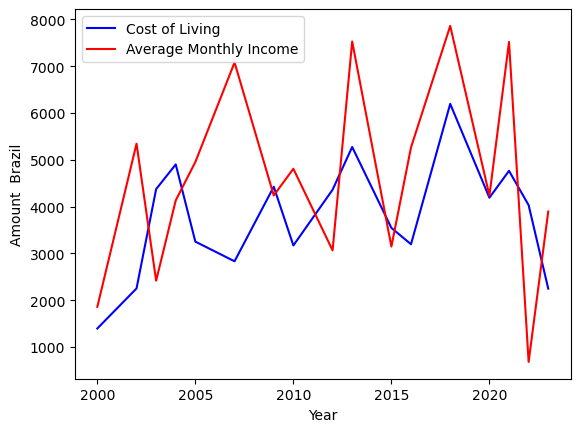

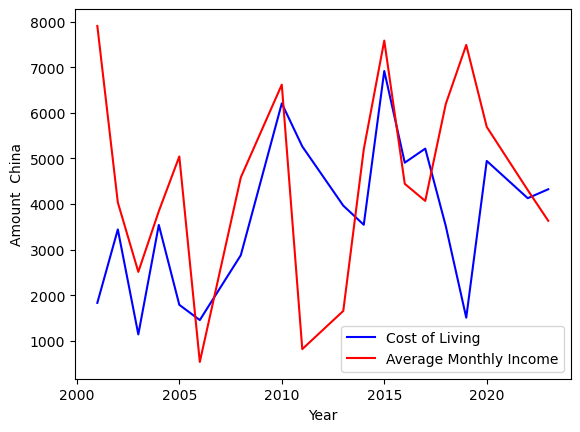

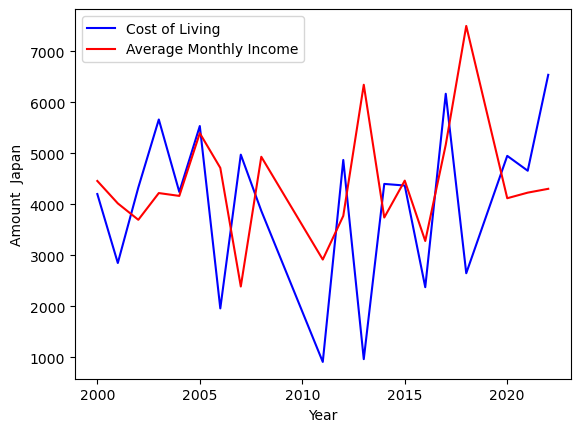

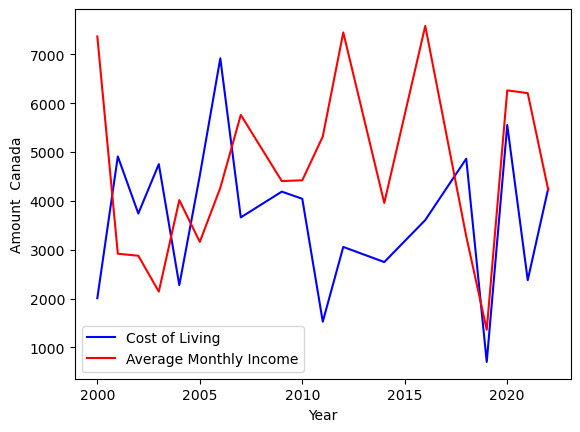

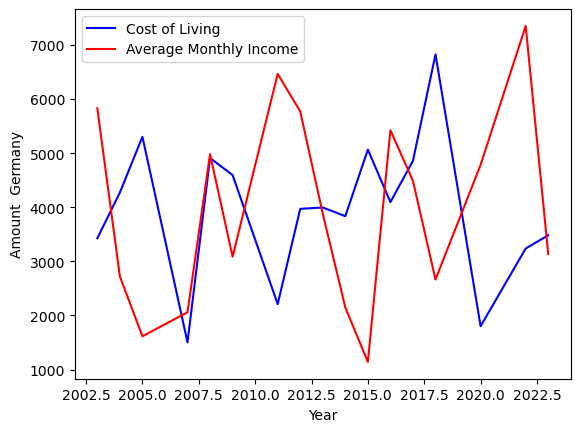

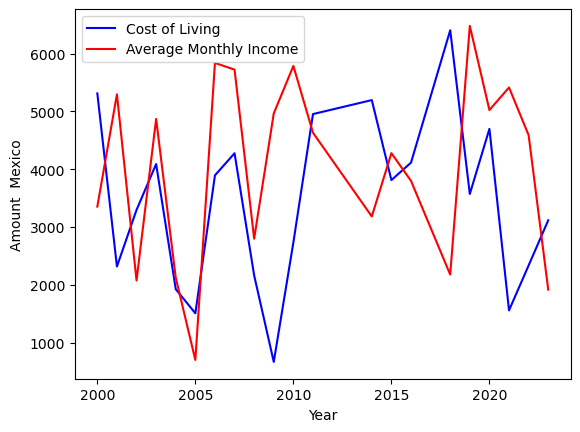

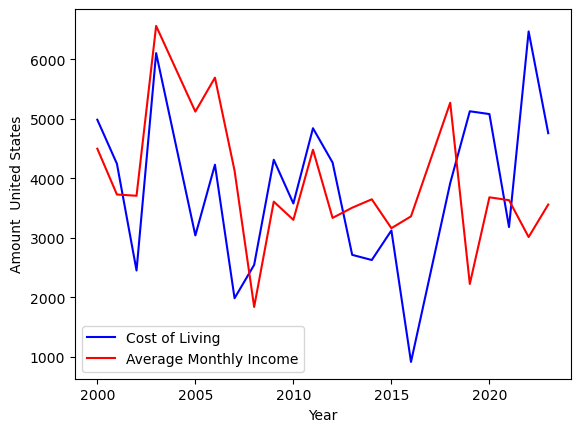

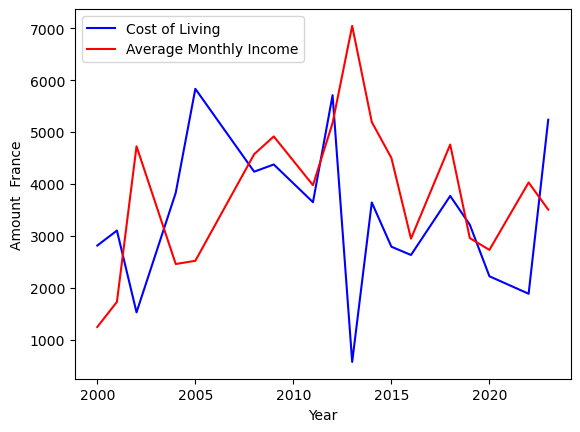

In [28]:
#Generieren Plots von AMI und CoL

#Definieren der Länderdaten
Länderdaten_AMI = [
    {'Länderdaten': df_australia, 'label': 'Australia'},
    {'Länderdaten': df_india, 'label': 'India'},
    {'Länderdaten': df_russia, 'label': 'Russia'},
    {'Länderdaten': df_south_africa, 'label': 'South Africa'},
    {'Länderdaten': df_brazil, 'label': 'Brazil'},
    {'Länderdaten': df_china, 'label': 'China'},
    {'Länderdaten': df_japan, 'label': 'Japan'},
    {'Länderdaten': df_canada, 'label': 'Canada'},
    {'Länderdaten': df_germany, 'label': 'Germany'},
    {'Länderdaten': df_mexico, 'label': 'Mexico'},
    {'Länderdaten': df_united_states, 'label': 'United States'},
    {'Länderdaten': df_france, 'label': 'France'},
]

#Schleifer für die Länderdaten
for länder in Länderdaten_AMI:
    df = länder['Länderdaten']
    label = länder['label']

#Gestalten des Plots
    plt.figure()
    plt.plot(df["Year"], df['Cost_of_Living'], label='Cost of Living', color='blue')
    plt.plot(df["Year"], df['Average_Monthly_Income'], label='Average Monthly Income', color='red')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Amount  '  + label)
    plt.show()

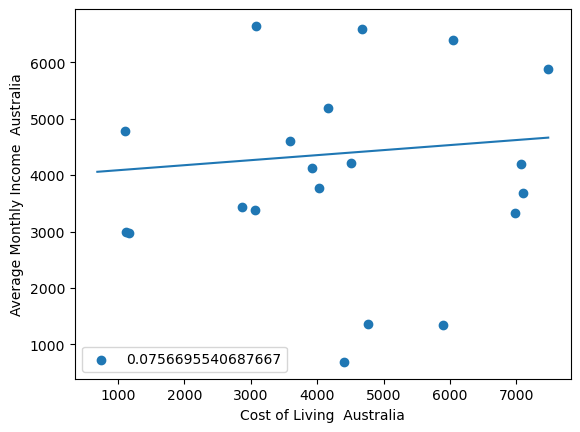

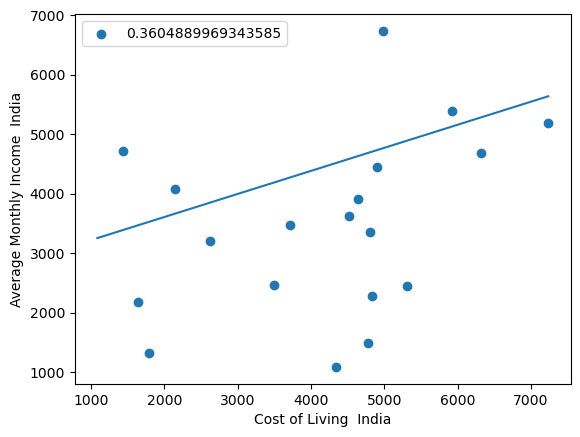

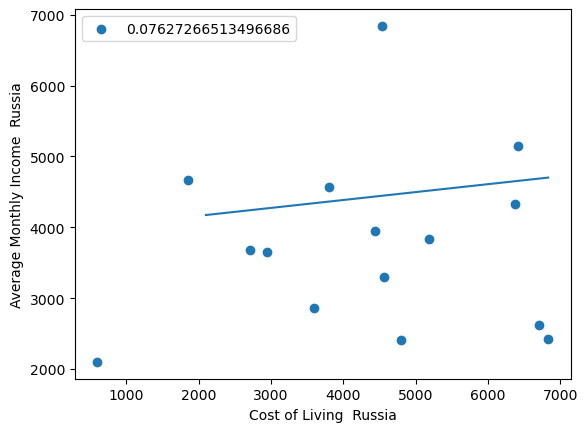

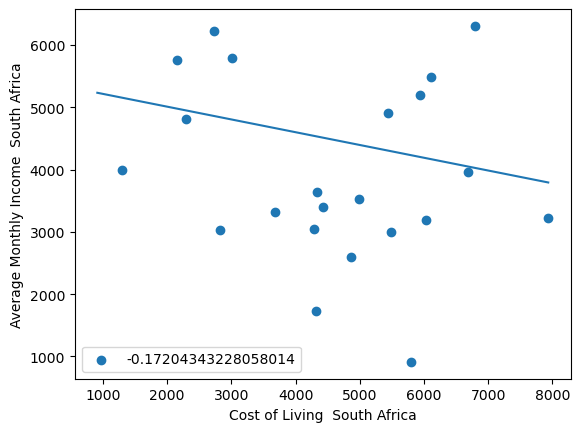

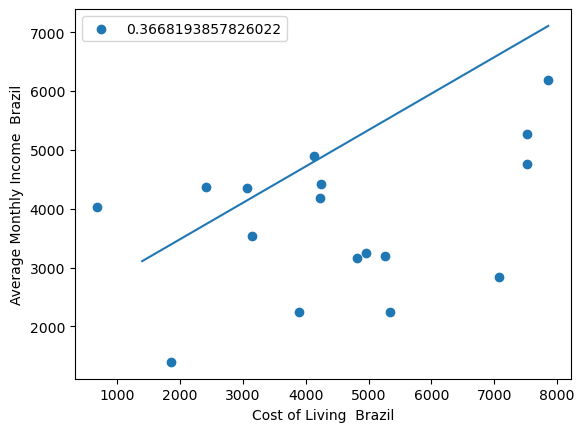

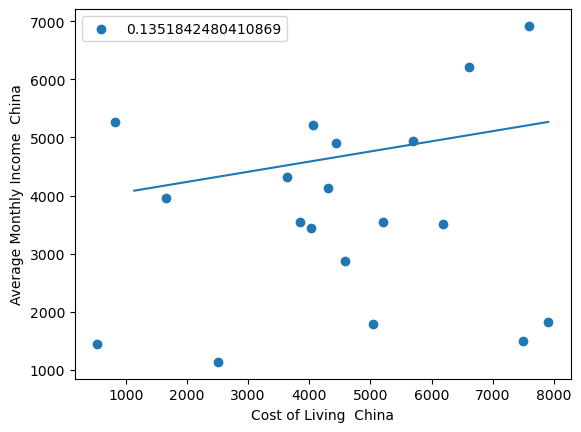

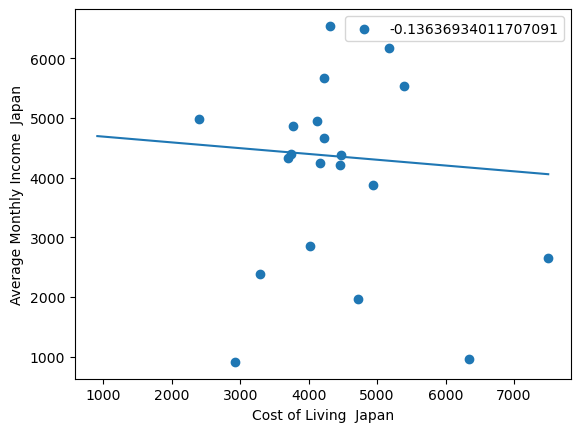

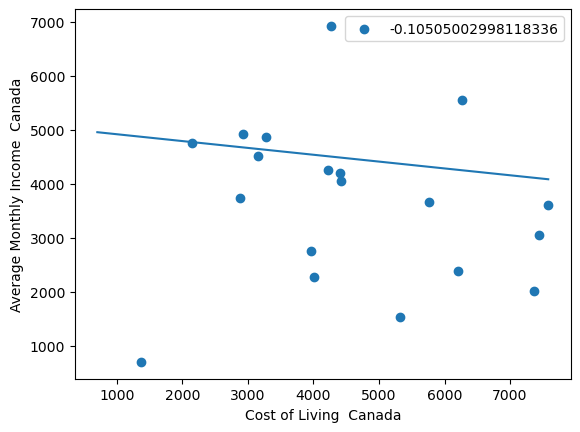

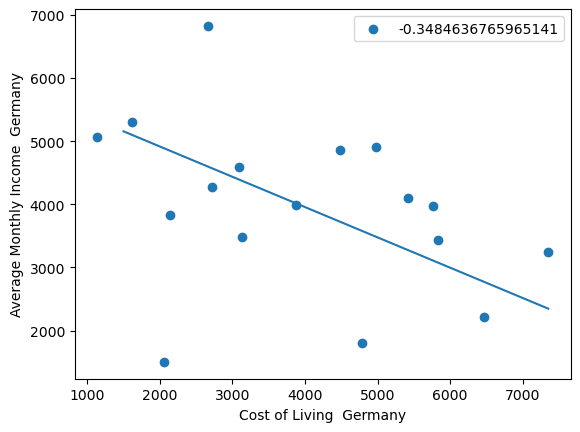

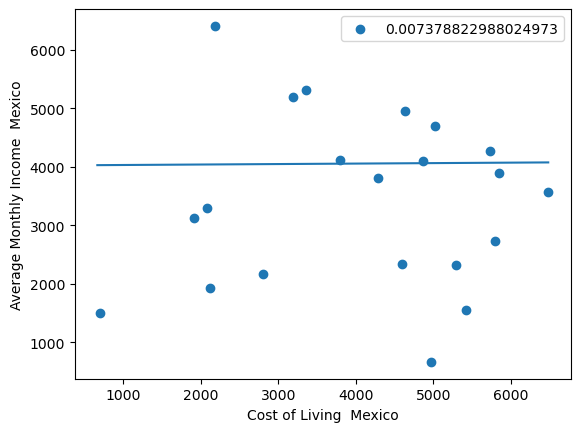

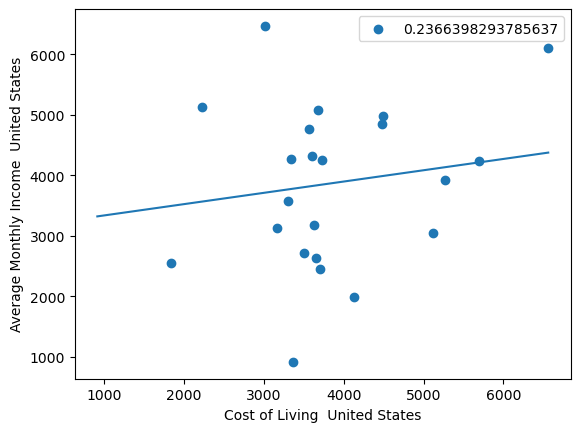

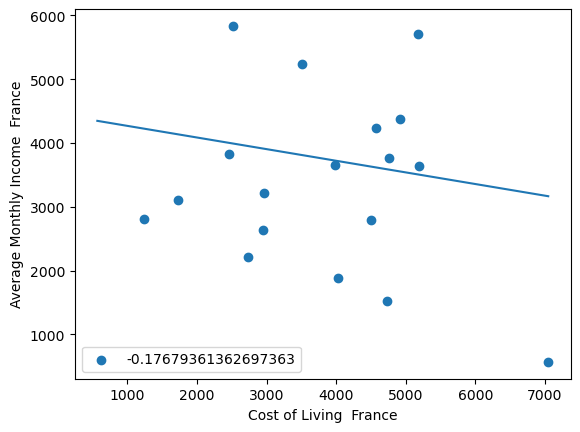

In [29]:
#Korrelation zwischen Cost of Living und Average Monthy Income

#Definieren der Länderdaten
Länderdaten_Korr = [
    {'Länderdaten': df_australia,'Korrelation':df_australia['Cost_of_Living'].corr(df_australia['Average_Monthly_Income']), 'label': 'Australia' },
    {'Länderdaten': df_india,'Korrelation':df_india['Cost_of_Living'].corr(df_india['Average_Monthly_Income']), 'label': 'India' },
    {'Länderdaten': df_russia,'Korrelation':df_russia['Cost_of_Living'].corr(df_russia['Average_Monthly_Income']), 'label': 'Russia' },
    {'Länderdaten': df_south_africa,'Korrelation':df_south_africa['Cost_of_Living'].corr(df_south_africa['Average_Monthly_Income']), 'label': 'South Africa' },
    {'Länderdaten': df_brazil,'Korrelation':df_brazil['Cost_of_Living'].corr(df_brazil['Average_Monthly_Income']), 'label': 'Brazil' },
    {'Länderdaten': df_china,'Korrelation':df_china['Cost_of_Living'].corr(df_china['Average_Monthly_Income']), 'label': 'China' },
    {'Länderdaten': df_japan,'Korrelation':df_japan['Cost_of_Living'].corr(df_japan['Average_Monthly_Income']), 'label': 'Japan' },
    {'Länderdaten': df_canada,'Korrelation':df_canada['Cost_of_Living'].corr(df_canada['Average_Monthly_Income']), 'label': 'Canada' },
    {'Länderdaten': df_germany,'Korrelation':df_germany['Cost_of_Living'].corr(df_germany['Average_Monthly_Income']), 'label': 'Germany' },
    {'Länderdaten': df_mexico,'Korrelation':df_mexico['Cost_of_Living'].corr(df_mexico['Average_Monthly_Income']), 'label': 'Mexico' },
    {'Länderdaten': df_united_states,'Korrelation':df_united_states['Cost_of_Living'].corr(df_united_states['Average_Monthly_Income']), 'label': 'United States' },
    {'Länderdaten': df_france,'Korrelation':df_france['Cost_of_Living'].corr(df_france['Average_Monthly_Income']), 'label': 'France' },
]

for länder in Länderdaten_Korr:
    df = länder['Länderdaten']
    korrelation = länder['Korrelation']
    label = länder['label']
    
    #Erstellen eines scatterplot mit den Daten aus df
    plt.scatter(df['Average_Monthly_Income'], df['Cost_of_Living'], label = korrelation )
    
    #Berechnen der Regressionsgeraden
    slope, intercept = np.polyfit(df['Cost_of_Living'], df['Average_Monthly_Income'], 1)
    x = np.linspace(df['Cost_of_Living'].min(), df['Average_Monthly_Income'].max(), 100)
    y = slope * x + intercept
   
    #Gestalten des Plots
    plt.legend()
    plt.plot(x,y)
    plt.xlabel('Cost of Living  ' + label)
    plt.ylabel('Average Monthly Income  ' + label)
    plt.show()



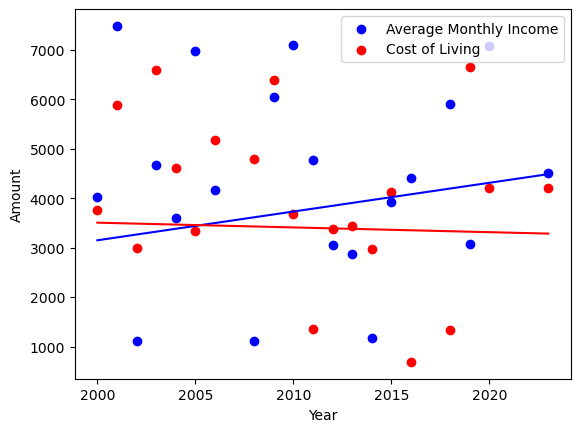

In [30]:
#Test
correlation_AMI = df_australia['Year'].corr(df_australia['Average_Monthly_Income'])
plt.scatter(df_australia['Year'], df_australia['Average_Monthly_Income'], label='Average Monthly Income', color='blue')
slope_AMI, intercept_AMI = np.polyfit(df['Year'], df['Average_Monthly_Income'], 1)
plt.plot(df_australia['Year'], slope_AMI * df_australia['Year'] + intercept_AMI, color='blue')

correlation_CoL = df_australia['Year'].corr(df_australia['Cost_of_Living'])
plt.scatter(df_australia['Year'], df_australia['Cost_of_Living'], label='Cost of Living', color='red')
slope_CoL, intercept_CoL = np.polyfit(df['Year'], df['Cost_of_Living'], 1)
plt.plot(df_australia['Year'], slope_CoL * df_australia['Year'] + intercept_CoL, color='red')

plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()

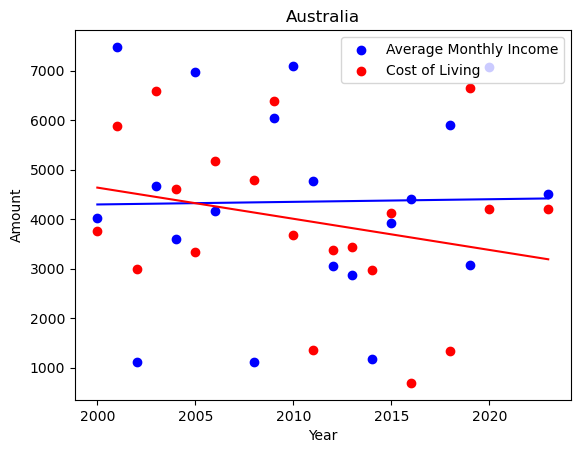

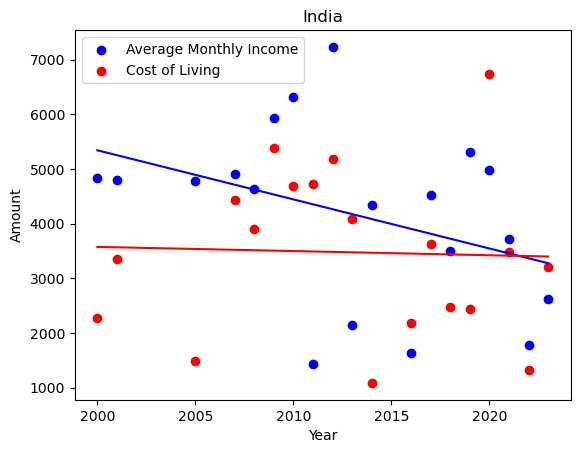

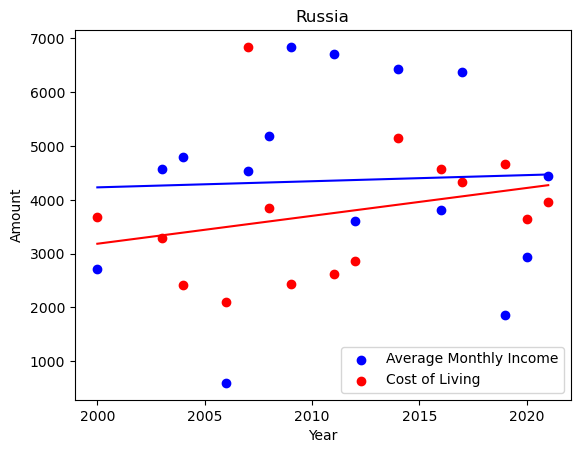

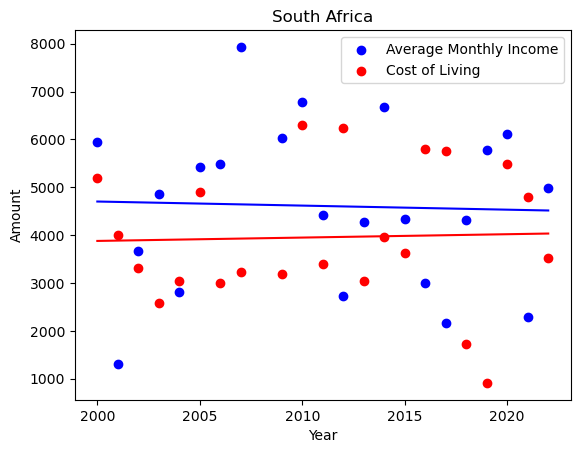

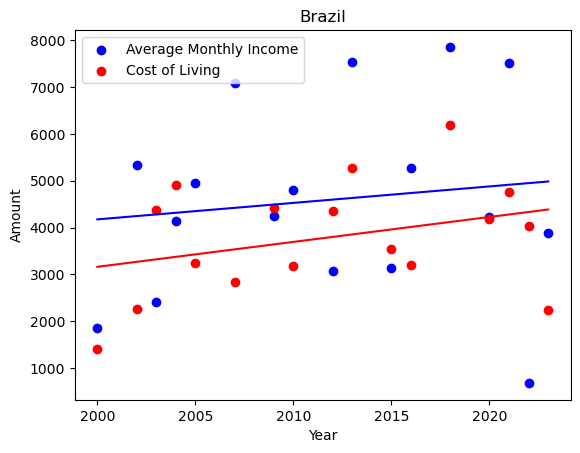

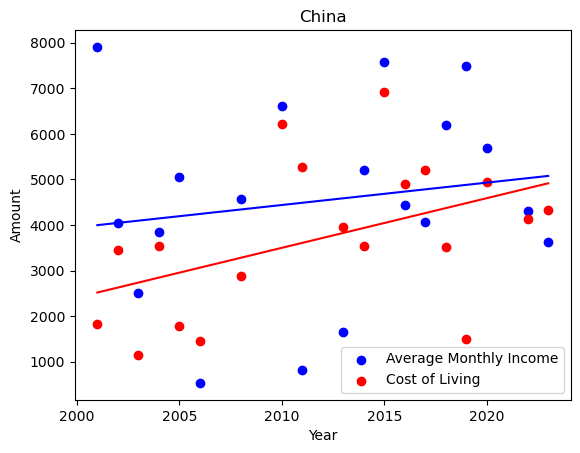

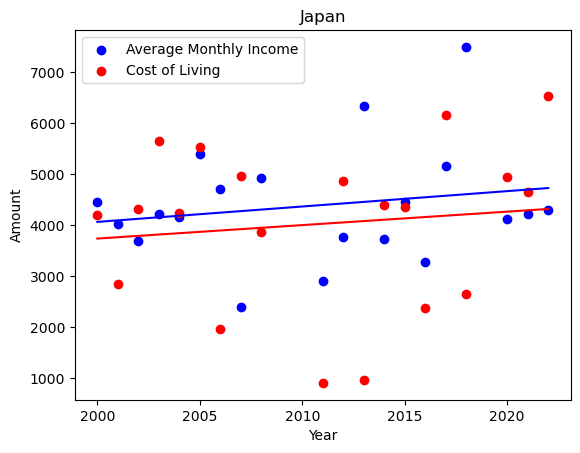

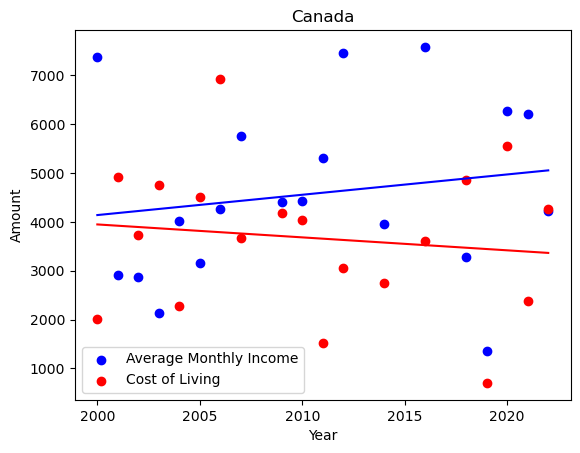

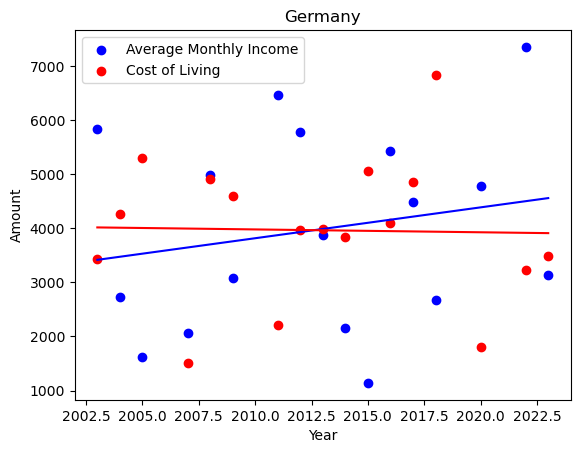

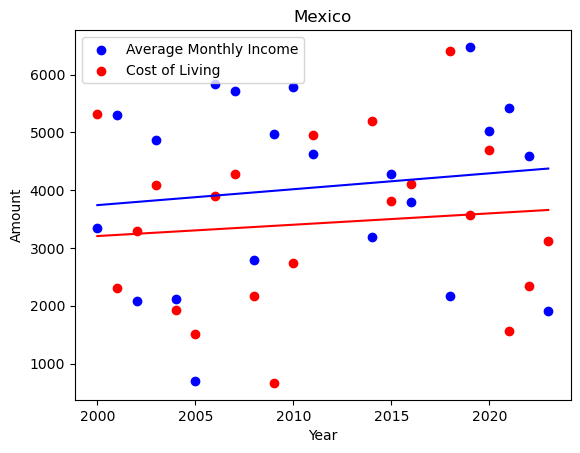

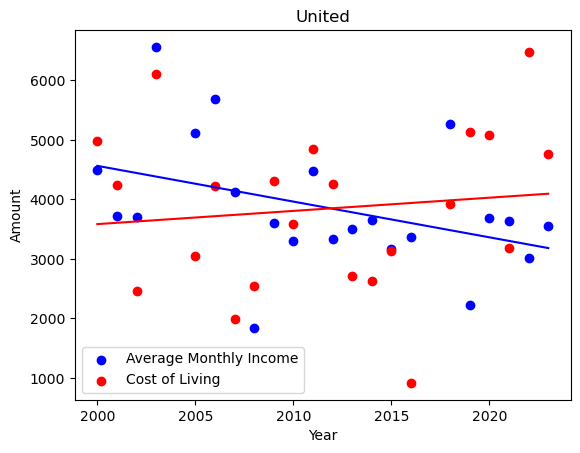

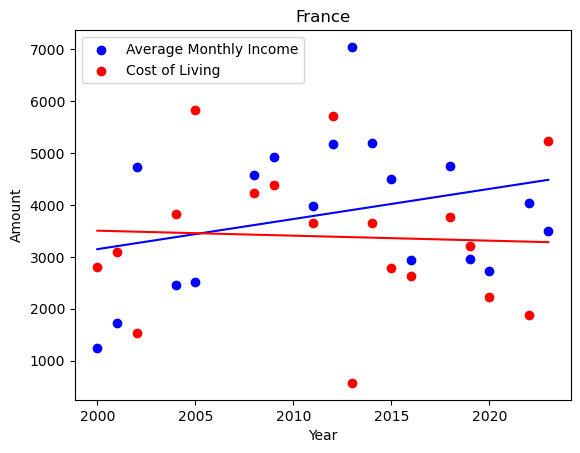

In [31]:
#Korrelation von Jahr zu Average_Monthly_income 
#Korrelation von JAhr zu Cost_of_Living
#Definieren der Länderdaten
Länderdaten_Korr_AMI_CoL = [
    {'Länderdaten': df_australia,'Korrelation_AMI':df_australia['Year'].corr(df_australia['Average_Monthly_Income']),'Korrelation_CoL':df_australia['Year'].corr(df_australia['Cost_of_Living']), 'label': 'Australia' },
    {'Länderdaten': df_india,'Korrelation_AMI':df_india['Year'].corr(df_india['Average_Monthly_Income']),'Korrelation_CoL':df_india['Year'].corr(df_india['Cost_of_Living']), 'label': 'India' },
    {'Länderdaten': df_russia,'Korrelation_AMI':df_russia['Year'].corr(df_russia['Average_Monthly_Income']),'Korrelation_CoL':df_russia['Year'].corr(df_russia['Cost_of_Living']), 'label': 'Russia' },
    {'Länderdaten': df_south_africa,'Korrelation_AMI':df_south_africa['Year'].corr(df_south_africa['Average_Monthly_Income']),'Korrelation_CoL':df_south_africa['Year'].corr(df_south_africa['Cost_of_Living']), 'label': 'South Africa' },
    {'Länderdaten': df_brazil,'Korrelation_AMI':df_brazil['Year'].corr(df_brazil['Average_Monthly_Income']),'Korrelation_CoL':df_brazil['Year'].corr(df_brazil['Cost_of_Living']), 'label': 'Brazil' },
    {'Länderdaten': df_china,'Korrelation_AMI':df_china['Year'].corr(df_china['Average_Monthly_Income']),'Korrelation_CoL':df_china['Year'].corr(df_china['Cost_of_Living']), 'label': 'China' },
    {'Länderdaten': df_japan,'Korrelation_AMI':df_japan['Year'].corr(df_japan['Average_Monthly_Income']),'Korrelation_CoL':df_japan['Year'].corr(df_japan['Cost_of_Living']), 'label': 'Japan' },
    {'Länderdaten': df_canada,'Korrelation_AMI':df_canada['Year'].corr(df_canada['Average_Monthly_Income']),'Korrelation_CoL':df_canada['Year'].corr(df_canada['Cost_of_Living']), 'label': 'Canada' },
    {'Länderdaten': df_germany,'Korrelation_AMI':df_germany['Year'].corr(df_germany['Average_Monthly_Income']),'Korrelation_CoL':df_germany['Year'].corr(df_germany['Cost_of_Living']), 'label': 'Germany' },
    {'Länderdaten': df_mexico,'Korrelation_AMI':df_mexico['Year'].corr(df_mexico['Average_Monthly_Income']),'Korrelation_CoL':df_mexico['Year'].corr(df_mexico['Cost_of_Living']), 'label': 'Mexico' },
    {'Länderdaten': df_united_states,'Korrelation_AMI':df_united_states['Year'].corr(df_united_states['Average_Monthly_Income']),'Korrelation_CoL':df_united_states['Year'].corr(df_united_states['Cost_of_Living']), 'label': 'United' },
    {'Länderdaten': df_france,'Korrelation_AMI':df_france['Year'].corr(df_france['Average_Monthly_Income']),'Korrelation_CoL':df_france['Year'].corr(df_france['Cost_of_Living']), 'label': 'France' },
    
]

for länder in Länderdaten_Korr_AMI_CoL:
    df = länder['Länderdaten']
    korrelation_ami = länder['Korrelation_AMI']
    korrelation_col = länder['Korrelation_CoL']
    label = länder['label']

    plt.scatter(df['Year'], df['Average_Monthly_Income'], label='Average Monthly Income', color='blue')
    slope_AMI, intercept_AMI = np.polyfit(df['Year'], df['Average_Monthly_Income'], 1)
    plt.plot(df['Year'], slope_AMI * df['Year'] + intercept_AMI, color='blue')
    
    plt.scatter(df['Year'], df['Cost_of_Living'], label='Cost of Living', color='red')
    slope_CoL, intercept_CoL = np.polyfit(df['Year'], df['Cost_of_Living'], 1)
    plt.plot(df['Year'], slope_CoL * df['Year'] + intercept_CoL, color='red')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title(label)
    plt.legend()
    plt.show()

In [32]:
#Berechnen der House Costs für jedes land
Länderdaten_HC = [
    {'Länderdaten': df_australia},
    {'Länderdaten': df_india,},
    {'Länderdaten': df_russia,},
    {'Länderdaten': df_south_africa,},
    {'Länderdaten': df_brazil,},
    {'Länderdaten': df_china,},
    {'Länderdaten': df_japan,},
    {'Länderdaten': df_canada,},
    {'Länderdaten': df_germany,},
    {'Länderdaten': df_mexico,},
    {'Länderdaten': df_united_states,},
    {'Länderdaten': df_france,},
]

for länder in Länderdaten_HC:
    df = länder['Länderdaten']

    df['House_Cost_Amount'] = df['Average_Monthly_Income'] * df['Housing_Cost_Percentage'] /100



In [33]:
#Berechnen der Steuern für jedes Land
#Berechnen der House Costs für jedes land
Länderdaten_HC = [
    {'Länderdaten': df_australia},
    {'Länderdaten': df_india, },
    {'Länderdaten': df_russia, },
    {'Länderdaten': df_south_africa, },
    {'Länderdaten': df_brazil, },
    {'Länderdaten': df_china, },
    {'Länderdaten': df_japan, },
    {'Länderdaten': df_canada, },
    {'Länderdaten': df_germany, },
    {'Länderdaten': df_mexico, },
    {'Länderdaten': df_united_states, },
    {'Länderdaten': df_france, },
]

for länder in Länderdaten_HC:
    df = länder['Länderdaten']

    df['Tax_Amount'] = df['Average_Monthly_Income'] * df['Tax_Rate'] / 100

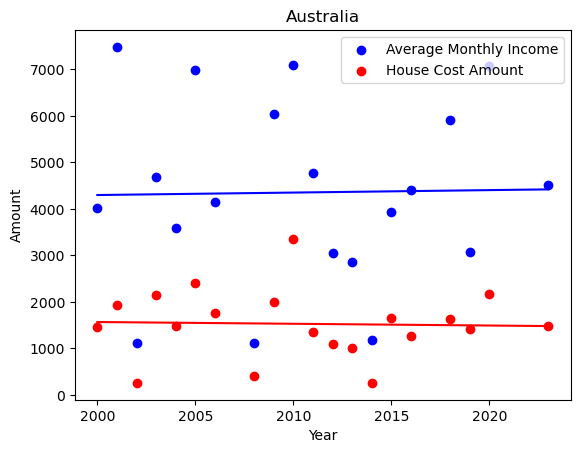

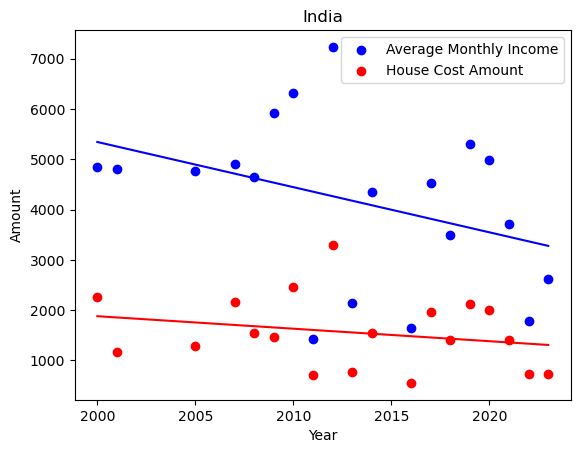

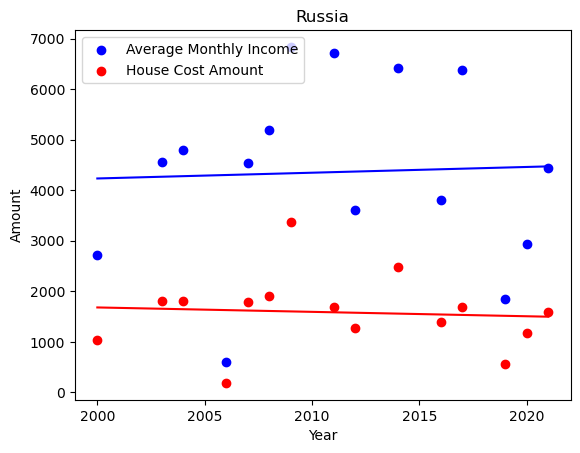

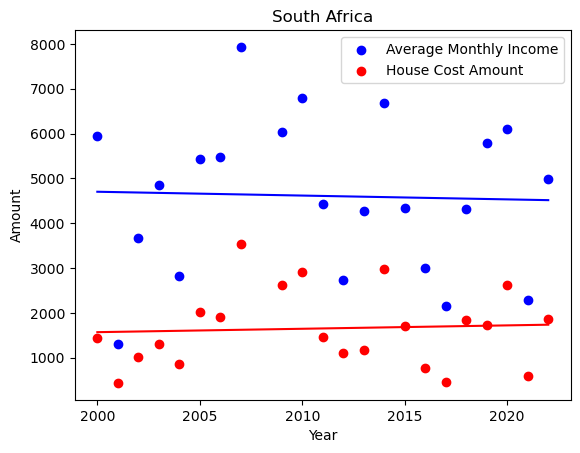

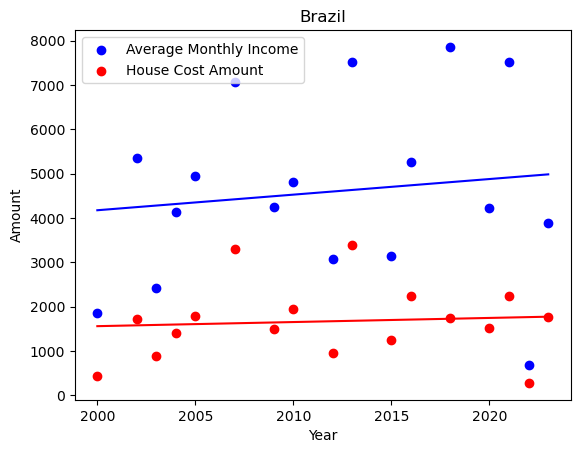

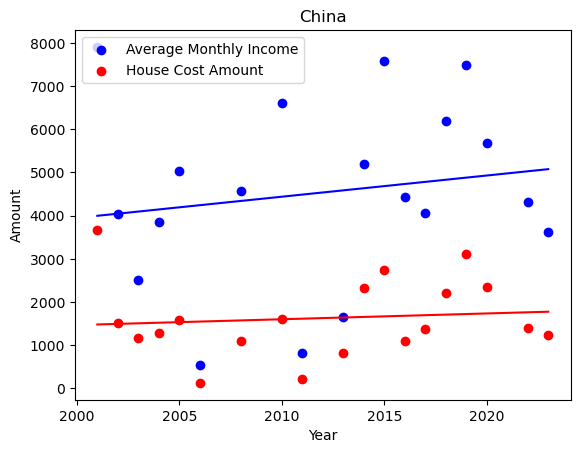

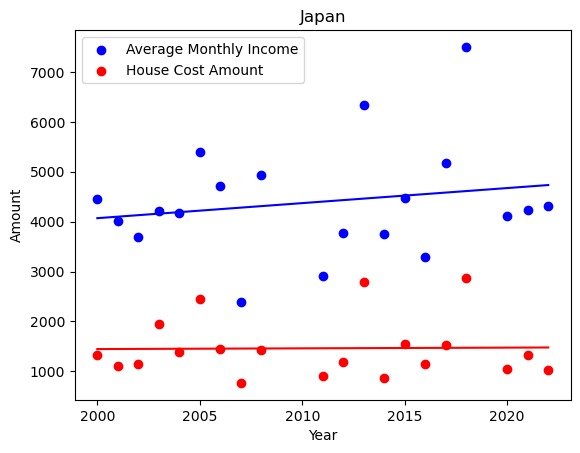

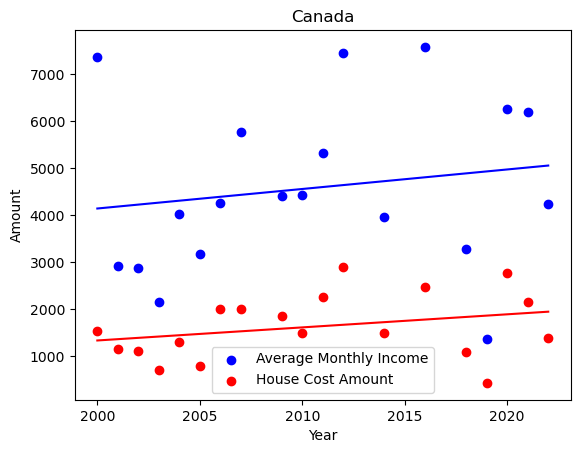

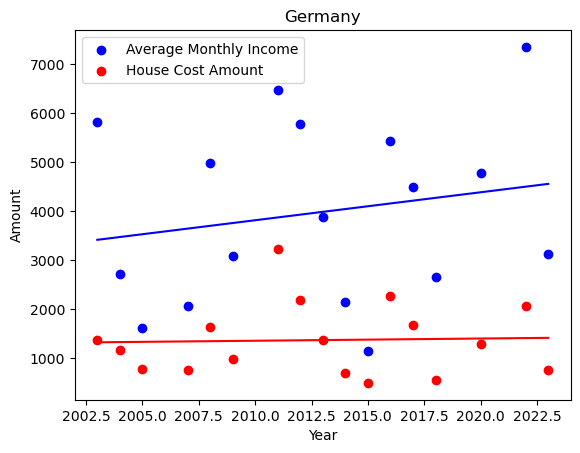

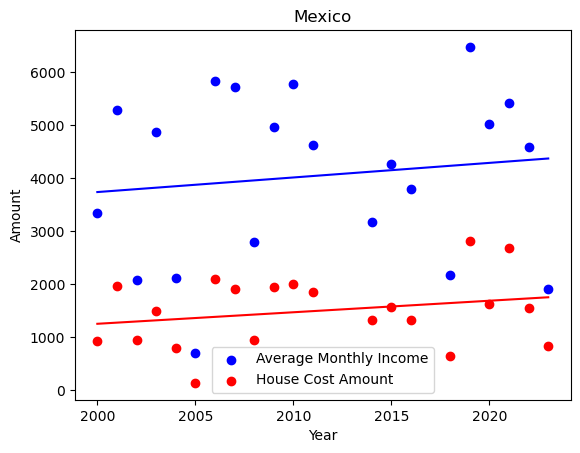

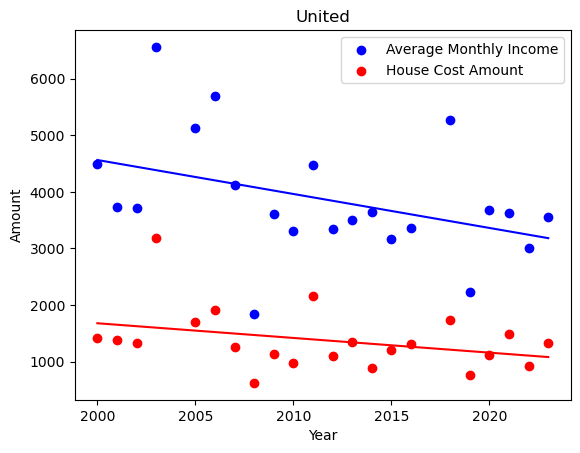

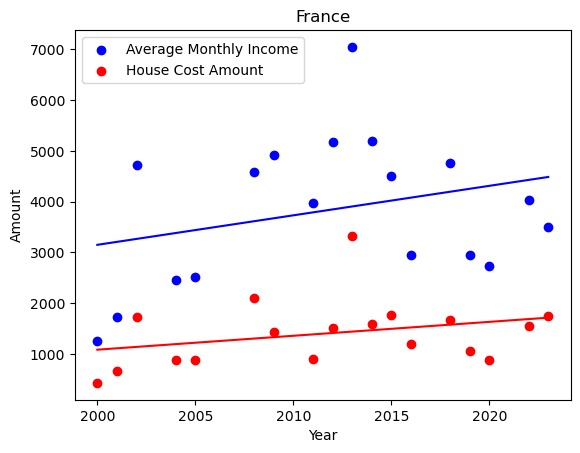

In [34]:
#Korrelation von Jahr zu Average_Monthly_income 
#Korrelation von JAhr zu House_Cost
#Definieren der Länderdaten
Länderdaten_Korr_AMI_HC = [
    {'Länderdaten': df_australia,'Korrelation_AMI':df_australia['Year'].corr(df_australia['Average_Monthly_Income']),'Korrelation_HC':df_australia['Year'].corr(df_australia['House_Cost_Amount']), 'label': 'Australia' },
    {'Länderdaten': df_india,'Korrelation_AMI':df_india['Year'].corr(df_india['Average_Monthly_Income']),'Korrelation_HC':df_india['Year'].corr(df_india['House_Cost_Amount']), 'label': 'India' },
    {'Länderdaten': df_russia,'Korrelation_AMI':df_russia['Year'].corr(df_russia['Average_Monthly_Income']),'Korrelation_HC':df_russia['Year'].corr(df_russia['House_Cost_Amount']), 'label': 'Russia' },
    {'Länderdaten': df_south_africa,'Korrelation_AMI':df_south_africa['Year'].corr(df_south_africa['Average_Monthly_Income']),'Korrelation_HC':df_south_africa['Year'].corr(df_south_africa['House_Cost_Amount']), 'label': 'South Africa' },
    {'Länderdaten': df_brazil,'Korrelation_AMI':df_brazil['Year'].corr(df_brazil['Average_Monthly_Income']),'Korrelation_HC':df_brazil['Year'].corr(df_brazil['House_Cost_Amount']), 'label': 'Brazil' },
    {'Länderdaten': df_china,'Korrelation_AMI':df_china['Year'].corr(df_china['Average_Monthly_Income']),'Korrelation_HC':df_china['Year'].corr(df_china['House_Cost_Amount']), 'label': 'China' },
    {'Länderdaten': df_japan,'Korrelation_AMI':df_japan['Year'].corr(df_japan['Average_Monthly_Income']),'Korrelation_HC':df_japan['Year'].corr(df_japan['House_Cost_Amount']), 'label': 'Japan' },
    {'Länderdaten': df_canada,'Korrelation_AMI':df_canada['Year'].corr(df_canada['Average_Monthly_Income']),'Korrelation_HC':df_canada['Year'].corr(df_canada['House_Cost_Amount']), 'label': 'Canada' },
    {'Länderdaten': df_germany,'Korrelation_AMI':df_germany['Year'].corr(df_germany['Average_Monthly_Income']),'Korrelation_HC':df_germany['Year'].corr(df_germany['House_Cost_Amount']), 'label': 'Germany' },
    {'Länderdaten': df_mexico,'Korrelation_AMI':df_mexico['Year'].corr(df_mexico['Average_Monthly_Income']),'Korrelation_HC':df_mexico['Year'].corr(df_mexico['House_Cost_Amount']), 'label': 'Mexico' },
    {'Länderdaten': df_united_states,'Korrelation_AMI':df_united_states['Year'].corr(df_united_states['Average_Monthly_Income']),'Korrelation_HC':df_united_states['Year'].corr(df_united_states['House_Cost_Amount']), 'label': 'United' },
    {'Länderdaten': df_france,'Korrelation_AMI':df_france['Year'].corr(df_france['Average_Monthly_Income']),'Korrelation_HC':df_france['Year'].corr(df_france['House_Cost_Amount']), 'label': 'France' },

]

for länder in Länderdaten_Korr_AMI_HC:
    df = länder['Länderdaten']
    korrelation_ami = länder['Korrelation_AMI']
    korrelation_hc = länder['Korrelation_HC']
    label = länder['label']

    plt.scatter(df['Year'], df['Average_Monthly_Income'], label='Average Monthly Income', color='blue')
    slope_AMI, intercept_AMI = np.polyfit(df['Year'], df['Average_Monthly_Income'], 1)
    plt.plot(df['Year'], slope_AMI * df['Year'] + intercept_AMI, color='blue')

    plt.scatter(df['Year'], df['House_Cost_Amount'], label='House Cost Amount', color='red')
    slope_hc, intercept_hc = np.polyfit(df['Year'], df['House_Cost_Amount'], 1)
    plt.plot(df['Year'], slope_hc * df['Year'] + intercept_hc, color='red')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title(label)
    plt.legend()
    plt.show()

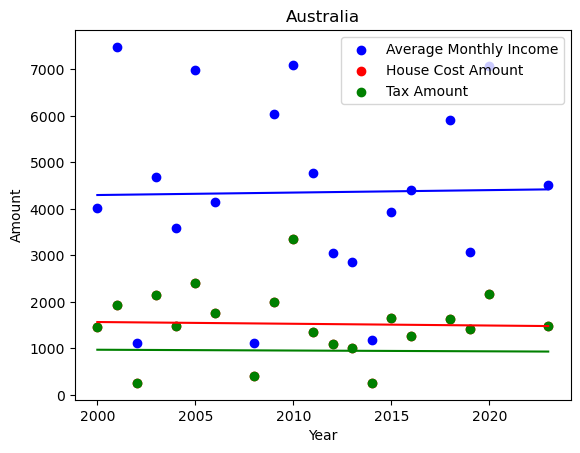

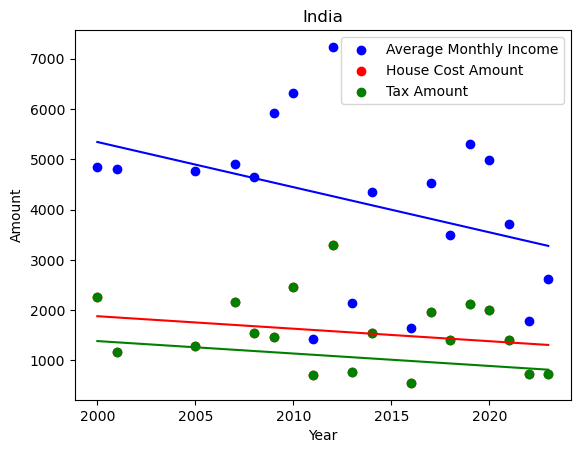

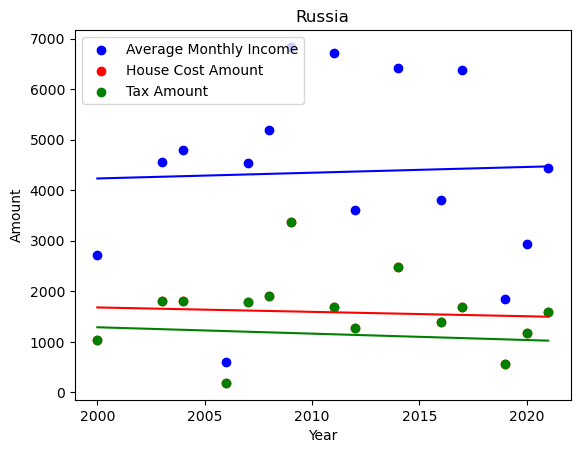

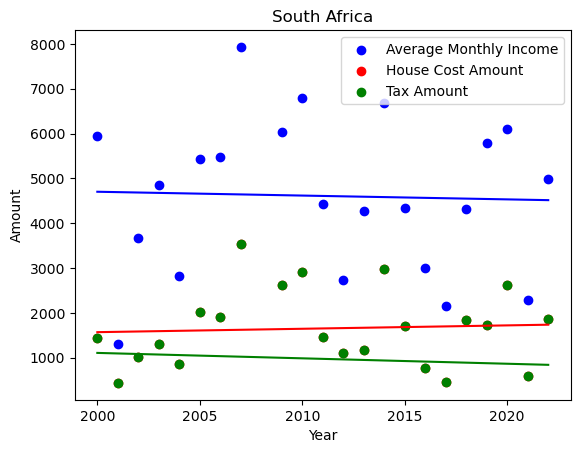

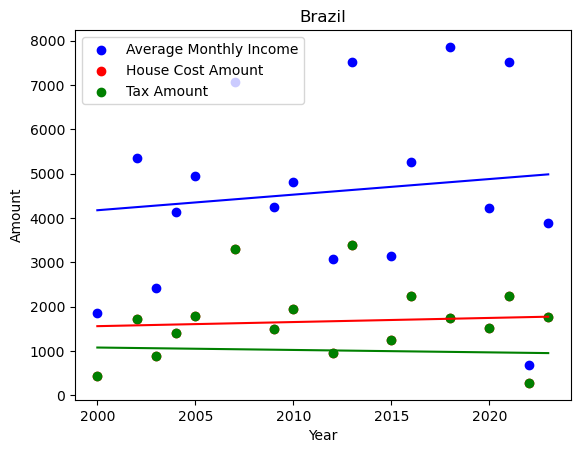

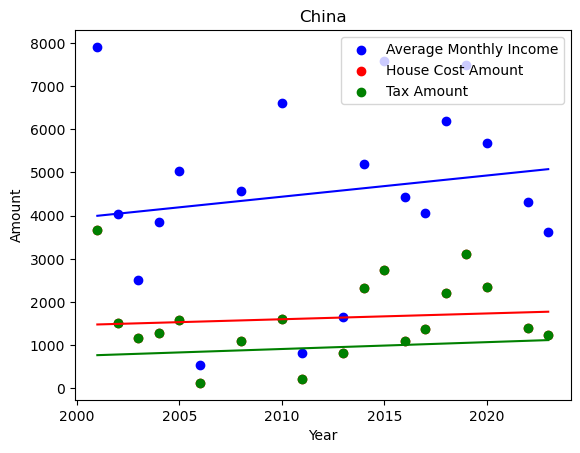

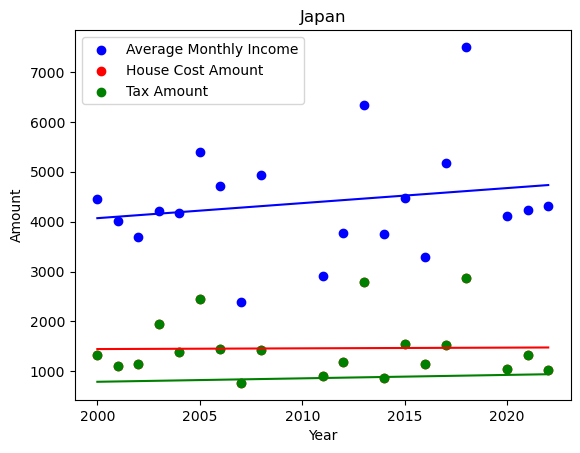

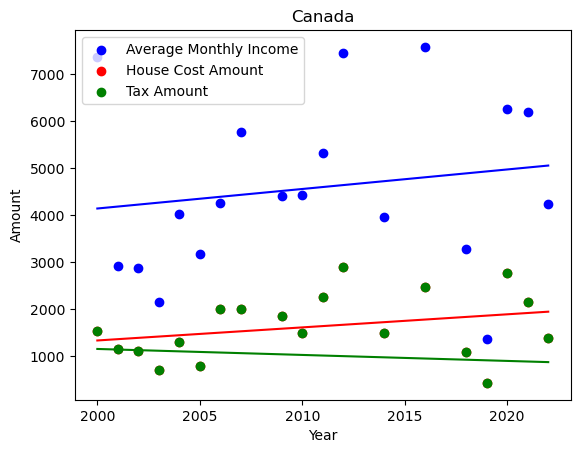

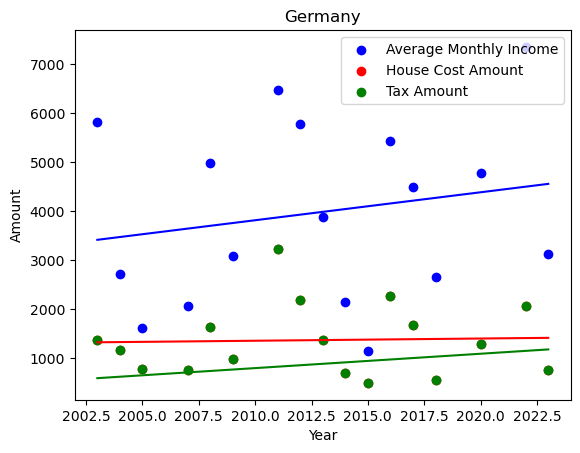

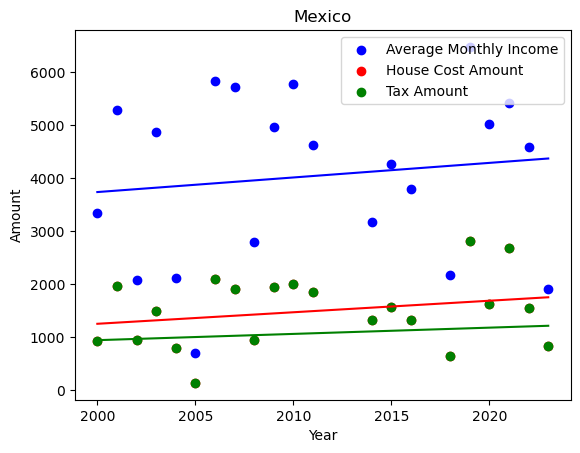

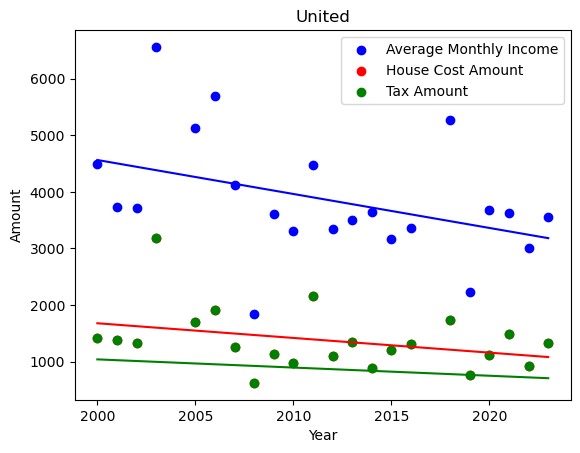

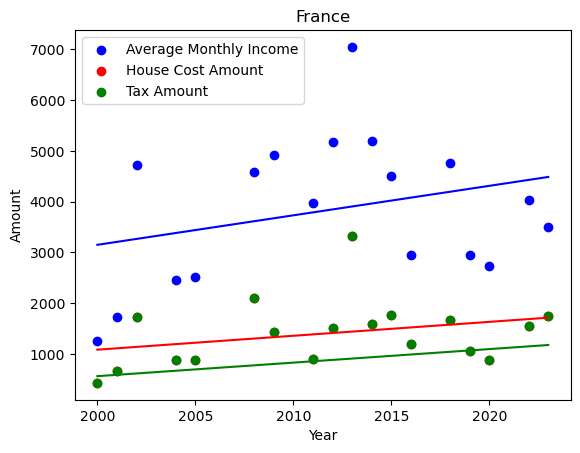

In [35]:
#Korrelation von Jahr zu Average_Monthly_income 
#Korrelation von JAhr zu House_Cost
#Definieren der Länderdaten
Länderdaten_Korr_AMI_HC = [
    {'Länderdaten': df_australia,'Korrelation_AMI':df_australia['Year'].corr(df_australia['Average_Monthly_Income']),'Korrelation_HC':df_australia['Year'].corr(df_australia['House_Cost_Amount']), 'Korrelation_TAX':df_australia['Year'].corr(df_australia['Tax_Amount']),'label': 'Australia'},
    {'Länderdaten': df_india,'Korrelation_AMI':df_india['Year'].corr(df_india['Average_Monthly_Income']),'Korrelation_HC':df_india['Year'].corr(df_india['House_Cost_Amount']),'Korrelation_TAX':df_india['Year'].corr(df_india['Tax_Amount']), 'label': 'India' },
    {'Länderdaten': df_russia,'Korrelation_AMI':df_russia['Year'].corr(df_russia['Average_Monthly_Income']),'Korrelation_HC':df_russia['Year'].corr(df_russia['House_Cost_Amount']), 'Korrelation_TAX':df_russia['Year'].corr(df_russia['Tax_Amount']),'label': 'Russia' },
    {'Länderdaten': df_south_africa,'Korrelation_AMI':df_south_africa['Year'].corr(df_south_africa['Average_Monthly_Income']),'Korrelation_HC':df_south_africa['Year'].corr(df_south_africa['House_Cost_Amount']),'Korrelation_TAX':df_south_africa['Year'].corr(df_south_africa['Tax_Amount']), 'label': 'South Africa' },
    {'Länderdaten': df_brazil,'Korrelation_AMI':df_brazil['Year'].corr(df_brazil['Average_Monthly_Income']),'Korrelation_HC':df_brazil['Year'].corr(df_brazil['House_Cost_Amount']),'Korrelation_TAX':df_brazil['Year'].corr(df_brazil['Tax_Amount']), 'label': 'Brazil' },
    {'Länderdaten': df_china,'Korrelation_AMI':df_china['Year'].corr(df_china['Average_Monthly_Income']),'Korrelation_HC':df_china['Year'].corr(df_china['House_Cost_Amount']), 'Korrelation_TAX':df_china['Year'].corr(df_china['Tax_Amount']), 'label': 'China' },
    {'Länderdaten': df_japan,'Korrelation_AMI':df_japan['Year'].corr(df_japan['Average_Monthly_Income']),'Korrelation_HC':df_japan['Year'].corr(df_japan['House_Cost_Amount']), 'Korrelation_TAX':df_japan['Year'].corr(df_japan['Tax_Amount']),'label': 'Japan' },
    {'Länderdaten': df_canada,'Korrelation_AMI':df_canada['Year'].corr(df_canada['Average_Monthly_Income']),'Korrelation_HC':df_canada['Year'].corr(df_canada['House_Cost_Amount']),'Korrelation_TAX':df_canada['Year'].corr(df_canada['Tax_Amount']), 'label': 'Canada' },
    {'Länderdaten': df_germany,'Korrelation_AMI':df_germany['Year'].corr(df_germany['Average_Monthly_Income']),'Korrelation_HC':df_germany['Year'].corr(df_germany['House_Cost_Amount']), 'Korrelation_TAX':df_germany['Year'].corr(df_germany['Tax_Amount']),'label': 'Germany' },
    {'Länderdaten': df_mexico,'Korrelation_AMI':df_mexico['Year'].corr(df_mexico['Average_Monthly_Income']),'Korrelation_HC':df_mexico['Year'].corr(df_mexico['House_Cost_Amount']), 'Korrelation_TAX':df_mexico['Year'].corr(df_mexico['Tax_Amount']),'label': 'Mexico' },
    {'Länderdaten': df_united_states,'Korrelation_AMI':df_united_states['Year'].corr(df_united_states['Average_Monthly_Income']),'Korrelation_HC':df_united_states['Year'].corr(df_united_states['House_Cost_Amount']), 'Korrelation_TAX':df_united_states['Year'].corr(df_united_states['Tax_Amount']),'label': 'United' },
    {'Länderdaten': df_france,'Korrelation_AMI':df_france['Year'].corr(df_france['Average_Monthly_Income']),'Korrelation_HC':df_france['Year'].corr(df_france['House_Cost_Amount']), 'Korrelation_TAX':df_france['Year'].corr(df_france['Tax_Amount']),'label': 'France' },

]

for länder in Länderdaten_Korr_AMI_HC:
    df = länder['Länderdaten']
    korrelation_ami = länder['Korrelation_AMI']
    korrelation_hc = länder['Korrelation_HC']
    korrelation_tax = länder['Korrelation_TAX']
    label = länder['label']

    plt.scatter(df['Year'], df['Average_Monthly_Income'], label='Average Monthly Income', color='blue')
    slope_AMI, intercept_AMI = np.polyfit(df['Year'], df['Average_Monthly_Income'], 1)
    plt.plot(df['Year'], slope_AMI * df['Year'] + intercept_AMI, color='blue')

    plt.scatter(df['Year'], df['House_Cost_Amount'], label='House Cost Amount', color='red')
    slope_hc, intercept_hc = np.polyfit(df['Year'], df['House_Cost_Amount'], 1)
    plt.plot(df['Year'], slope_hc * df['Year'] + intercept_hc, color='red')

    plt.scatter(df['Year'], df['House_Cost_Amount'], label='Tax Amount', color='green')
    slope_tax, intercept_tax = np.polyfit(df['Year'], df['Tax_Amount'], 1)
    plt.plot(df['Year'], slope_tax * df['Year'] + intercept_tax, color='green')

    plt.xlabel('Year')
    plt.ylabel('Amount')
    plt.title(label)
    plt.legend()
    plt.show()